In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For prettier charts
plt.style.use("ggplot")


In [10]:
df = pd.read_csv("superstore_final_dataset (1).csv", encoding="latin1")



In [11]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [13]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors='coerce')
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"], errors='coerce')



In [14]:
df.isnull().sum()
df["Postal_Code"] = df["Postal_Code"].fillna(0)


In [15]:
df["Year"] = df["Order_Date"].dt.year
df["Month"] = df["Order_Date"].dt.month
df["Month_Name"] = df["Order_Date"].dt.strftime("%b")


In [16]:
total_sales = df["Sales"].sum()
total_orders = df["Order_ID"].nunique()
total_customers = df["Customer_ID"].nunique()
avg_order_value = total_sales / total_orders

print("Total Sales:", total_sales)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Average Order Value:", avg_order_value)


Total Sales: 2261536.7827000003
Total Orders: 4922
Total Customers: 793
Average Order Value: 459.4751691791955


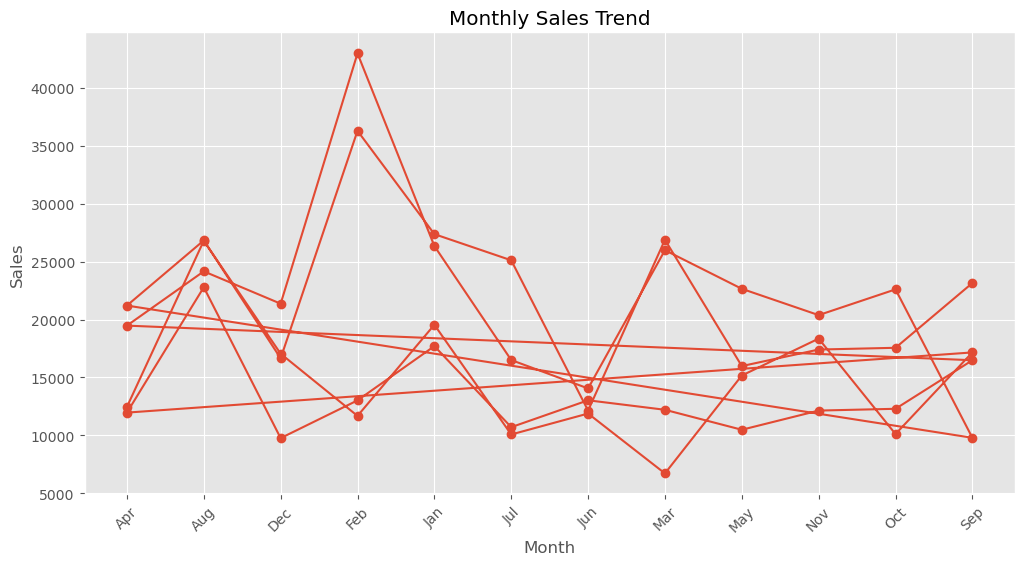

In [17]:
monthly_sales = df.groupby(["Year","Month_Name"])["Sales"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Month_Name"], monthly_sales["Sales"], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


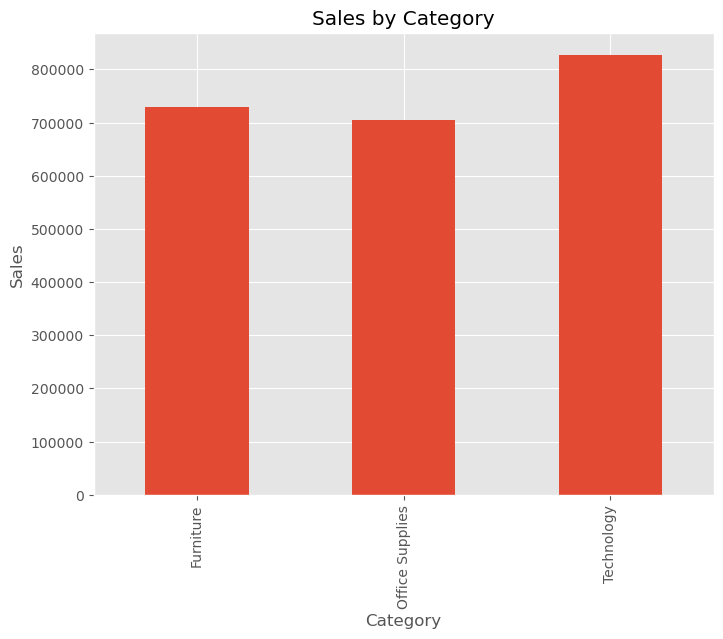

In [18]:
cat_sales = df.groupby("Category")["Sales"].sum()

cat_sales.plot(kind='bar', figsize=(8,6))
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.show()


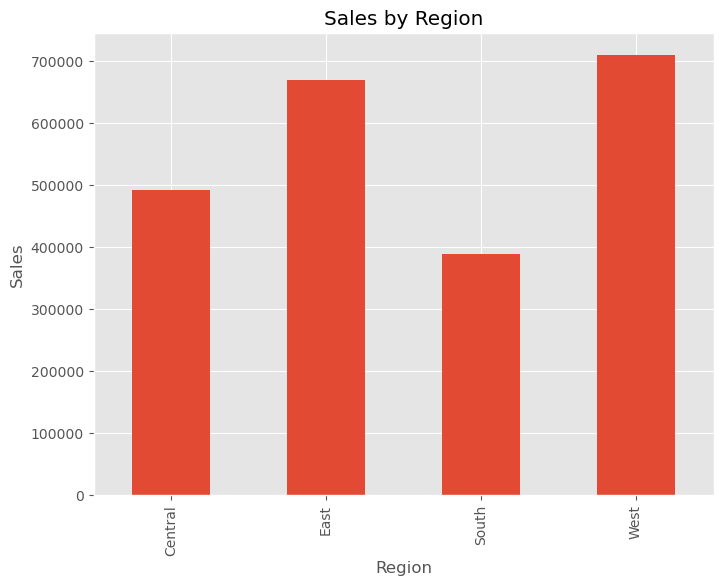

In [19]:
region_sales = df.groupby("Region")["Sales"].sum()

region_sales.plot(kind="bar", figsize=(8,6))
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.show()


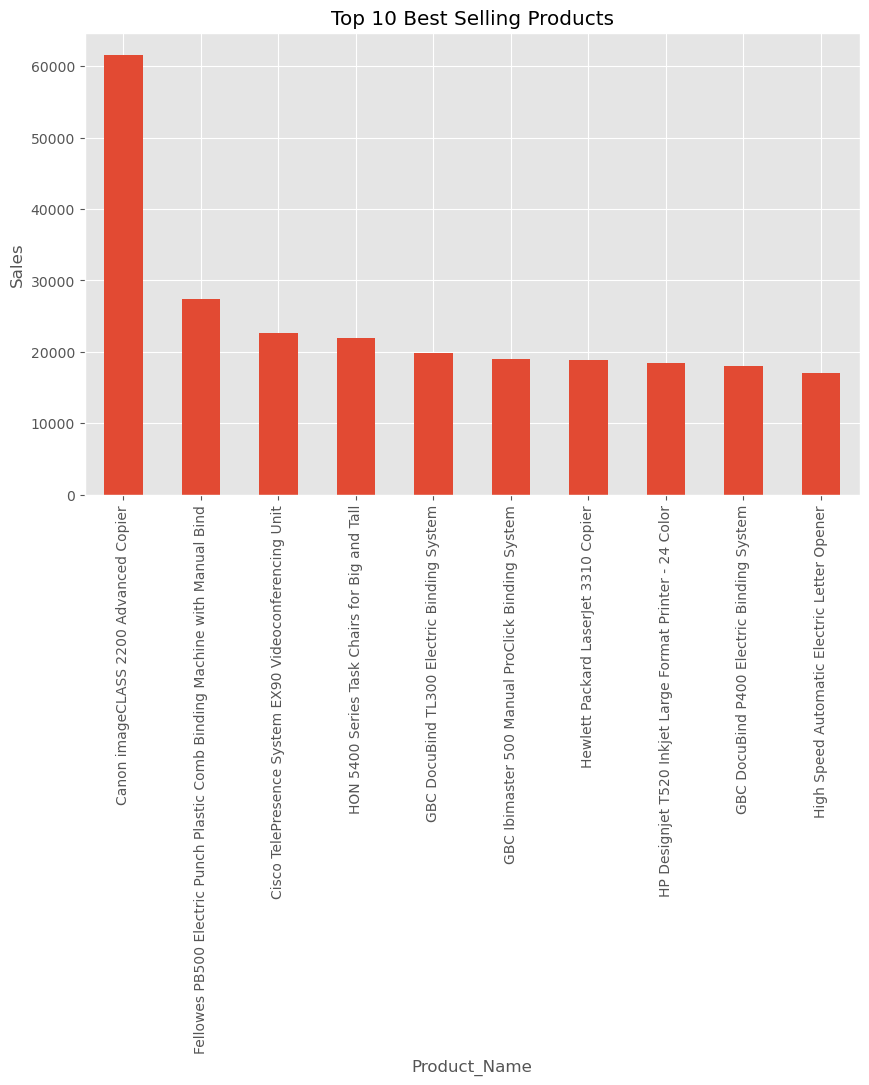

In [20]:
top_products = df.groupby("Product_Name")["Sales"].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Best Selling Products")
plt.ylabel("Sales")
plt.show()


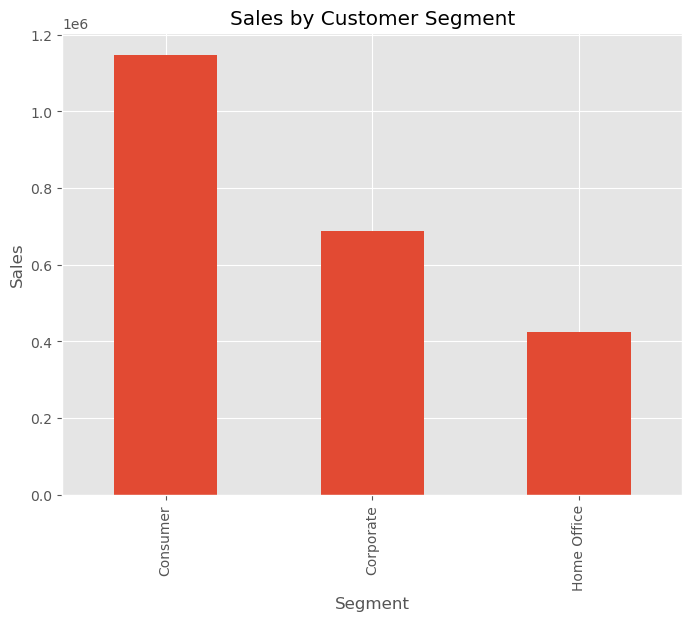

In [21]:
segment_sales = df.groupby("Segment")["Sales"].sum()

segment_sales.plot(kind="bar", figsize=(8,6))
plt.title("Sales by Customer Segment")
plt.ylabel("Sales")
plt.show()


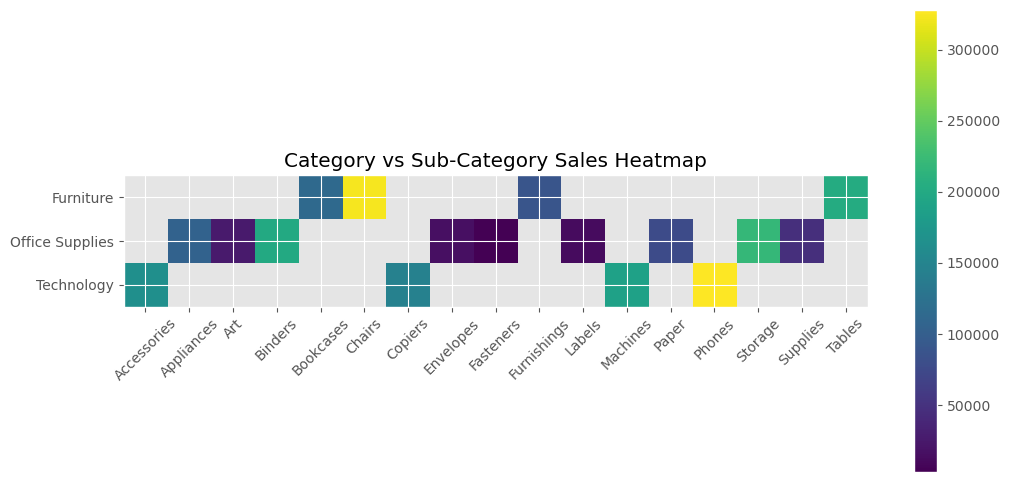

In [22]:
pivot = df.pivot_table(values="Sales", index="Category", columns="Sub_Category", aggfunc="sum")

plt.figure(figsize=(12,6))
plt.imshow(pivot, cmap="viridis")
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar()
plt.title("Category vs Sub-Category Sales Heatmap")
plt.show()


In [24]:
print("SALES PERFORMANCE SUMMARY ")
print("Total Sales:", total_sales)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Average Order Value:", round(avg_order_value,2))

print("\nTop Categories:")
print(cat_sales.sort_values(ascending=False))

print("\nTop Regions:")
print(region_sales.sort_values(ascending=False).head(5))

print("\nTop Products:")
print(top_products)


SALES PERFORMANCE SUMMARY 
Total Sales: 2261536.7827000003
Total Orders: 4922
Total Customers: 793
Average Order Value: 459.48

Top Categories:
Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

Top Regions:
Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

Top Products:
Product_Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJe